#### Load libraries

In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm,binom
from scipy.io import loadmat
from scipy.special import digamma, gammaln, gamma
from numpy.linalg import inv
import cv2
from scipy import ndimage
import tensorflow as tf

C:\Users\keert\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Output original images
images_gray = np.load('C:/Users/keert/Documents/project_fall/image-colorization/l/gray_scale.npy')


In [3]:
# Generate the kernel required
kernel_size = 3
Kernel_num = 1
Kernel  = np.random.rand(kernel_size,kernel_size,Kernel_num)

In [4]:
# definition to project the kernel
def project_kernel(Kernel):
    Kernel_num = Kernel.shape[2]
    for i in range(Kernel_num):
        tmp = Kernel[:,:,i]
        if(np.linalg.norm(tmp,'fro')>0):
            Kernel[:,:,i]=Kernel[:,:,i]/np.linalg.norm(tmp,'fro')
        else:
            Kernel[:,:,i] = Kernel[:,:,i]
    return Kernel


In [5]:
A0 = project_kernel(Kernel)

#### create the input dataset

In [6]:
images_conv = np.zeros_like(images_gray)

In [7]:
for i in range(images_conv.shape[0]):
    images_conv[i] = ndimage.convolve(images_gray[i], A0[:,:,0], mode='constant', cval=1.0)

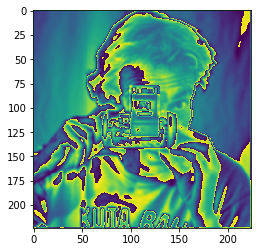

In [8]:
plt.imshow(images_conv[300])
plt.show()

#### create train and test set

In [9]:
num_train = 22000
num_val = 500
num_test = 2500

X_train = images_conv[:num_train]
X_train = X_train.reshape((22000,224,224,1))
Y_train = images_gray[:num_train]
Y_train = Y_train.reshape((22000,224,224,1))

X_val = images_conv[num_train:num_train+num_val]
X_val = X_val.reshape((500,224,224,1))
Y_val = images_gray[num_train:num_train+num_val]
Y_val = Y_val.reshape((500,224,224,1))

X_test = images_conv[num_train+num_val:]
X_test = X_test.reshape((2500,224,224,1))
Y_test = images_gray[num_train+num_val:]
Y_test = Y_test.reshape((2500,224,224,1))

#### Training


In [10]:
with tf.name_scope('inputs'):
        xs = tf.placeholder(shape=[None, 224, 224, 1], dtype=tf.float32)
        ys = tf.placeholder(shape=[None, 224, 224, 1], dtype=tf.int64)
        is_training = tf.placeholder(tf.bool, name='is_training')

In [13]:
from ecbm4040.neuralnets.encoder_decoder import encoder_decoder
output, loss = encoder_decoder(xs, ys, is_training)

ValueError: Variable conv_layer_0/conv_kernel_0 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\keert\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\keert\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "C:\Users\keert\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
